### K-Means Algorithm from scratch

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

def euclideanDistance(x,y):
    return np.linalg.norm(x - y, axis=1)   
    
class kMeans():
    
    def __init__(self, k=1,random_state = 1):
        self.random_state = random_state
        self.k = k # number of centroids
        
    def fit(self,X):
        
        k = 3
        C = []
        
        for i in range(k):
            prev = random_index = np.random.randint(0, X.shape[0])
            while random_index!=prev:
                random_index = np.random.randint(0, X.shape[0])
            C.append(X[random_index])
            prev = random_index
        
        C = np.array(C)
        
        plt.scatter(X[:,0],X[:,1], c='blue', s=50)
        plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='g')
        
        C_old = np.zeros(C.shape)
        #print(C_old)
        clusters = np.zeros(len(X))
        #print(clusters)
        error = euclideanDistance(C, C_old)
        
        #print(C,C_old,error)
        
        
        prev_cluster = np.zeros(error.shape)
        
        while error.all() != prev_cluster.all():
            
            prev_cluster = error
            for i in range(len(X)):
                distances = euclideanDistance(X[i], C)
                cluster = np.argmin(distances)
                clusters[i] = cluster
            
            C_old = copy.deepcopy(C)
            for i in range(k):
                points = [X[j] for j in range(len(X)) if clusters[j] == i]
                C[i] = np.mean(points, axis=0)
            error = euclideanDistance(C, C_old)
        
        colors = ['r', 'g', 'b']
        fig, ax = plt.subplots()
        for i in range(k):            
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=50, c=colors[i])
        ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


In [183]:
X = np.array([[2,4],[2,6], [2,8], [10,4], [10,6], [10,8]]) 

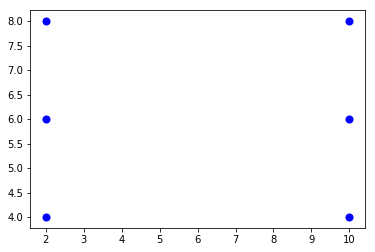

In [184]:
 plt.scatter(X[:, 0], X[:, 1], s=50, color='blue');

In [185]:
obj = kMeans(3)

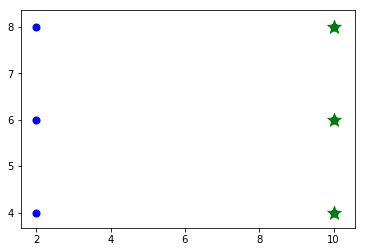

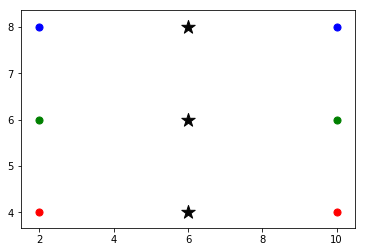

In [197]:
obj.fit(X)

 * The clusters that were obtained by minimizing the Euclidean distance with the centroids.  

 * The drawbacks are it would not work for cyclic data, meaning data that might include time for instance where 23:00 is close to 12:00 but it would'nt cluster that in the same group.

### DecisionTreeRegressor and AdaboostRegressor with Boston housing dataset


In [209]:
from sklearn.datasets import load_boston
boston_dataset =load_boston()

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
# Predicting the price of a house 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [212]:
regressor = DecisionTreeRegressor(random_state=0)

In [213]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [220]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [221]:
boston['MEDV'] = boston_dataset.target

In [222]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/home/priyanka/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


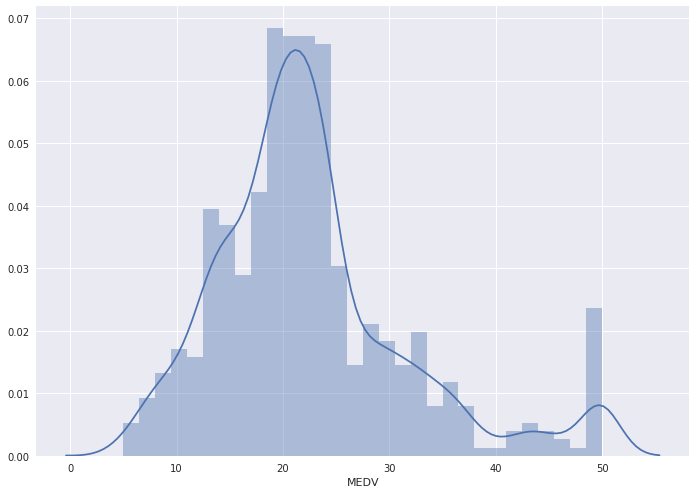

In [225]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [363]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [387]:
dtree = DecisionTreeRegressor(max_depth= 2,max_features=2)

In [388]:
dtree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=2,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [389]:
y_train_predict = dtree.predict(X_train)
train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
y_test_predict = dtree.predict(X_test)
test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [390]:
train_rmse,test_rmse

(5.132848840716717, 5.061794246276888)

In [391]:
ada = AdaBoostRegressor()
ada.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [392]:
y_train_predict = ada.predict(X_train)
train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
y_test_predict = ada.predict(X_test)
test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [393]:
train_rmse,test_rmse

(4.081280842092055, 5.269835512420041)

In [406]:
ada = AdaBoostRegressor(base_estimator=dtree,n_estimators=500, learning_rate=0.001,loss='linear',random_state=1)
ada.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=2,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.001, loss='linear', n_estimators=500,
         random_state=1)

In [407]:
y_train_predict = ada.predict(X_train)
train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
y_test_predict = ada.predict(X_test)
test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
train_rmse,test_rmse

(4.565476449599415, 4.942767076587589)

* The Best value of mean squared error for testing was obtained by setting max_depth= 2 and max_features=2 for the DecisionTreeRegressor. The value of the TEST MSE=5.061794246276888
* The AdaboostRegressor takes the same DecisionTreeRegressor() instance and n_estimators=500, learning_rate=0.001,loss='linear',random_state=1. The value of the TEST MSE=4.942767076587589

* The best value of the TEST MSE=4.942767076587589 with the boosting algorithm.